In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [13]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [14]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
x_axis = list(df.columns)
y_axis = list(df.columns)
print(x_axis)
print(y_axis)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


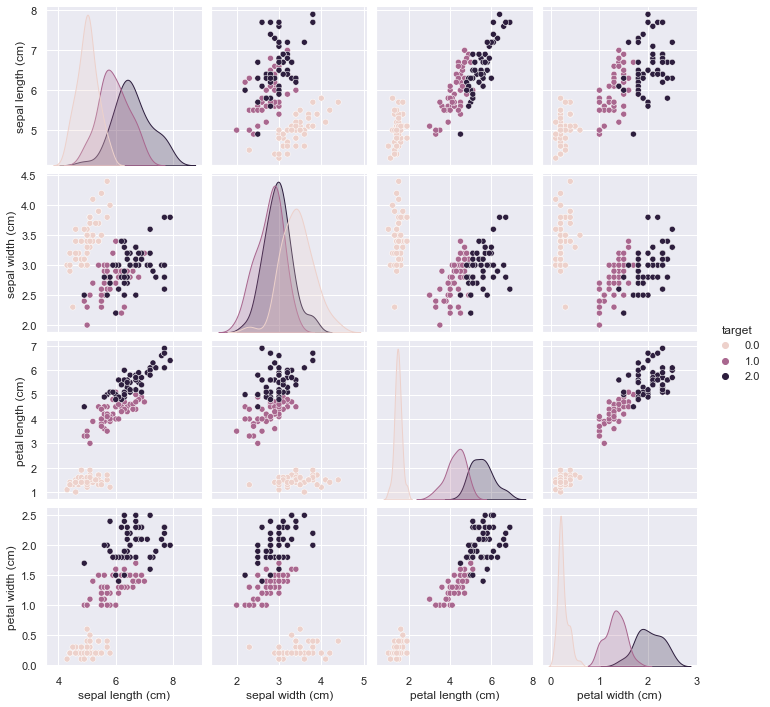

In [15]:
sns.pairplot(data = data1, hue = 'target', vars=x_axis)

In [12]:
pca = PCA()
pca.fit(df)

PCA()

In [16]:
list(df.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
loading_scores = pd.Series(pca.components_[0], index = list(df.columns))
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

petal length (cm)    0.856671
sepal length (cm)    0.361387
petal width (cm)     0.358289
sepal width (cm)    -0.084523
dtype: float64


In [ ]:
# code below taken from Chris Yogozinski / Josh Stramers "statquest pca"

In [22]:
#creating sample data set
genes = ['gene' + str(i) for i in range(1, 101)] #create fake gene names
wt = ['wt' + str(i) for i in range(1,6)] #wild type genes
ko = ['ko' + str(i) for i in range(1,6)] #knock out genes

In [23]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [24]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5, )
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size= 5)

In [25]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,531,545,547,544,530,37,41,53,40,35
gene2,550,530,540,563,547,71,55,55,53,51
gene3,432,432,469,486,454,177,166,175,155,158
gene4,722,693,635,729,721,375,360,372,354,357
gene5,79,77,79,84,88,573,566,521,478,512


In [26]:
data.shape

(100, 10)

In [27]:
scaled_data = preprocessing.scale(data.T) #transpose data to have samples in the rows
#StandardScaler().fit_transform(data.T)

In [28]:
pca = PCA()

In [29]:
pca.fit(scaled_data)

PCA()

In [30]:
pca_data = pca.transform(scaled_data)

In [31]:
#for plotting
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

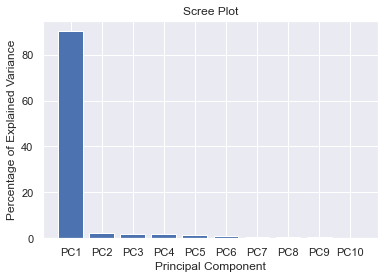

In [32]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [33]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

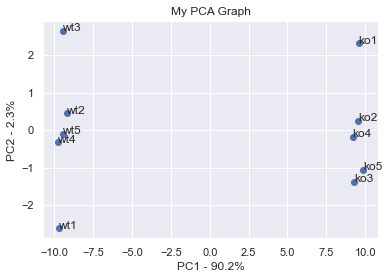

In [34]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [35]:
loading_scores = pd.Series(pca.components_[0], index = genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene1    -0.105233
gene2    -0.105232
gene9    -0.105224
gene83   -0.105215
gene88   -0.105211
gene89   -0.105209
gene71    0.105203
gene17    0.105183
gene36   -0.105170
gene6    -0.105165
dtype: float64
